(Deprecated) Create a dataset with shift based on the two moons dataset. Verify the label balance as well.

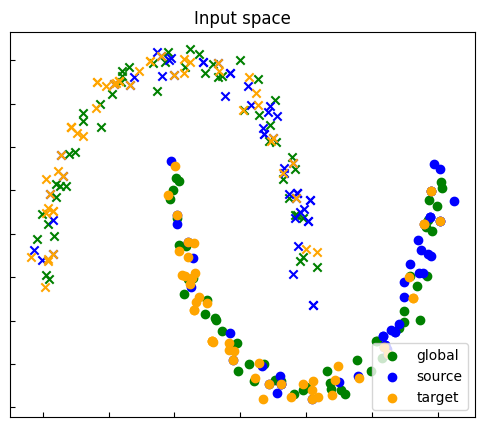

Global: 0.5, Source: 0.5, Target: 0.5


In [3]:
from datagen.datagen import make_moons_triplet
from datagen.visualize import visualize_shift2d
import numpy as np

xs,ys,xg,yg,xt,yt = make_moons_triplet(force_balance=True)
visualize_shift2d(xs,ys,xg,yg,xt,yt)
print(f"Global: {np.mean(yg)}, Source: {np.mean(ys)}, Target: {np.mean(yt)}")

Create several datasets with the builder and visualize

In [5]:
from datagen.selector import  Selector
from datagen.builder import  DatasetBuilder
from datagen.visualize import visualize_shift2d_px, visualize_shift3d_px

init_classification = {
    'n_samples' : 500,
    'n_features' : 2,
    'n_informative' : 2,
    'n_repeated' : 0,
    'n_redundant' : 0
}

selector = Selector(100, 100, 100, 1, 1, 2)
builder = DatasetBuilder(init_classification, selector)
runs = 4
for _ in range(runs):
    xs, ys, xg, yg, xt, yt = builder.generate()
    visualize_shift2d_px(xs,ys,xg,yg,xt,yt)
    print(f"Global: {np.mean(yg)}, Source: {np.mean(ys)}, Target: {np.mean(yt)}")

Global: 0.5, Source: 0.79, Target: 0.21


Global: 0.51, Source: 0.65, Target: 0.37


Global: 0.5, Source: 0.59, Target: 0.42


Global: 0.49, Source: 0.36, Target: 0.73
